# Customer_Life_time-Random Forest 

In [1]:
from IPython.display import Image
import os
!ls ../input/image-clv

customer-lifetime-value-1024x536.jpg


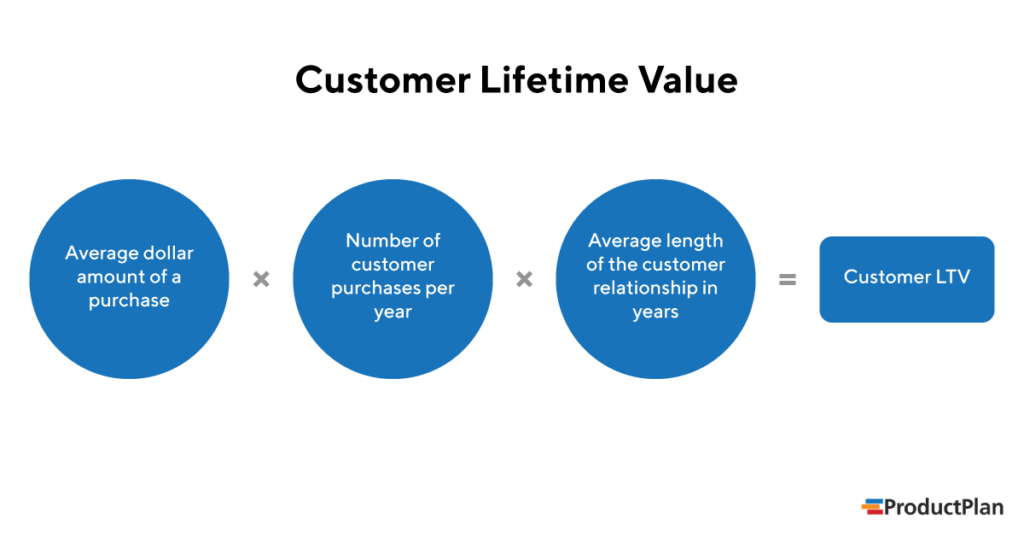

In [2]:
Image("/kaggle/input/image-clv/customer-lifetime-value-1024x536.jpg")

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Import libraries and load data">Import libraries and load data</a></li>
        <li><a href="https://#Visualization">Visualization</a></li>
        <li><a href="https://#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
        <li><a href="https://#Prepare before building the model">Prepare before building the model</a></li> 
        <li><a href="https://#Building Model Random Forest">Building Model Random Forest</a></li> 
        <li><a href="https://#Model Evaluation">Model Evaluation</a></li> 
    </ol>
</div>
<br>
<hr>

<h2>1. Import Libraries And Load Data</h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
data=pd.read_csv("/kaggle/input/marketing-customer/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

**Descriptive Statistic**

In [5]:
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- Checking type and null value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

- Checking columns name of DataFrame

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

- Our "Respone" variable that is going to be our model's output isn't a number. So we need to convert ot to numbers as 0 and 1 so that Python can understand it

In [8]:
# Encoding output variable
data['Engaged']=data['Response'].apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
round(data['Engaged'].mean(),3)

0.143

**The apply function :** Turns Yes responses into 1's everything slese into 0's. Yes meaning the customer was engaged, while no meaning not engaged. so the everage engagement rate is 0.143, meaning our anerage engagement rate is roughly 14%. Now, you know why they say sales is a number game. Only a few say yes. 

**Feature Engineering**

In [10]:
# Checking Descriptive Statictis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
Engaged,9134.0,0.143201,0.350297,0.000000,0.000000,0.000000,0.000000,1.000000


<h2>2. Visualization</h2>

- Now we will visualize some categarical variables so we can understand more about them

**2.1 Overall engagement rate**

In [11]:
# Building a function add labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [12]:
# Count of Customer for response:
df=data.groupby('Response')['Customer'].count()
df

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

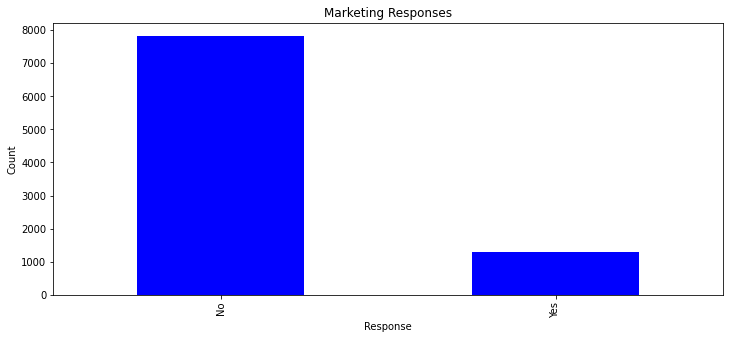

In [13]:
fig=data.groupby('Response')['Customer'].count().plot(kind='bar',color="blue",grid=False,
figsize=(12,5),title="Marketing Responses").set_ylabel("Count")                                                    

We can see that the number of people who oppose the marketing strategy is:
- Nearly 8000 people did not respond
- About 1300 people reacted

**2.2 Engagement rates by offer type**

In [14]:
by_offer_type_df= data.loc[data['Response']=='Yes'].groupby(['Renew Offer Type']).count()[
    'Customer']/data.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

- Above is the ratio, the number of customers interacting with each type of offer
**Renew Offer Type*
- Offer1    0.158316
- Offer2    0.233766
- Offer3    0.020950
- Offer4         NaN (no renew)

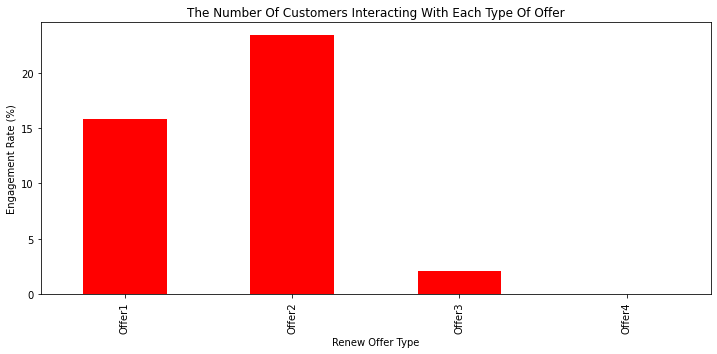

In [15]:
ax=(by_offer_type_df*100.0).plot(
kind="bar",figsize=(12,5),color='red',grid=False)
ax.set_ylabel('Engagement Rate (%)')
plt.title("The Number Of Customers Interacting With Each Type Of Offer")
plt.show()

**2.3 Engagement rates by offer type and verhicle class**


In [16]:
by_offer_type_data=data.loc[
    data['Response']=='Yes'
].groupby([
    "Renew Offer Type", 'Vehicle Class'
]).count()['Customer']/data.groupby('Renew Offer Type').count()['Customer']

by_offer_type_data=by_offer_type_data.unstack().fillna(0)
by_offer_type_data

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


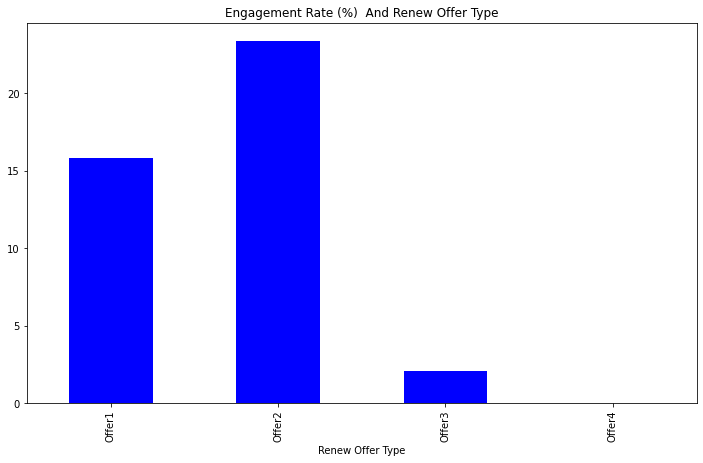

In [17]:
ax=(by_offer_type_df*100.0).plot(
    kind='bar',
    color='blue',
    figsize=(12,7),
    grid=False
)
ax.set_label("Engagement Rate")
plt.title('Engagement Rate (%)  And Renew Offer Type')
plt.show()

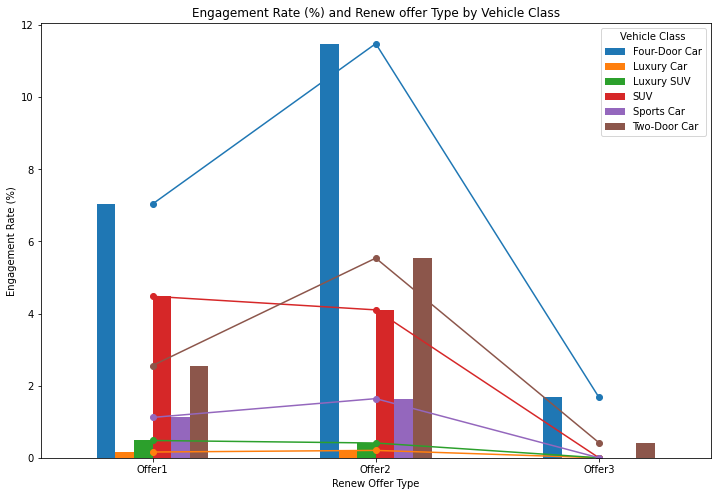

In [18]:
ax=(by_offer_type_data*100).plot(
kind='bar',
figsize=(10,7),
grid=False
)
ax1 = (by_offer_type_data*100.0).plot(figsize=(12,8), marker='o',legend=False, ax=ax)
plt.title("Engagement Rate (%) and Renew offer Type by Vehicle Class")
ax.set_ylabel('Engagement Rate (%)')

plt.show()

**2.4 Engagement rates by sales channel**

In [19]:
by_sales_channel_data=data.loc[
data['Response']=='Yes'
].groupby(['Sales Channel']).count()['Customer']/data.groupby("Sales Channel").count()['Customer']
by_sales_channel_data 

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

Above is the interaction rate by sales channel of each brand:
    **Sales Channel**
- Agent          0.191544
- Branch         0.114531
- Call Center    0.108782
- Web            0.117736

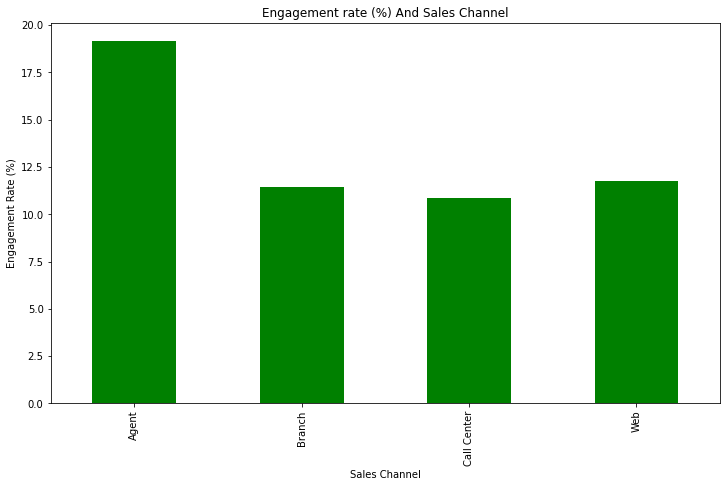

In [20]:
ax= (by_sales_channel_data*100.0).plot(
kind="bar",
figsize=(12,7),
color='green',
grid=False,
)
ax.set_ylabel("Engagement Rate (%)")
plt.title("Engagement rate (%) And Sales Channel")

plt.show()

**2.5 Engagement rates by sales channel and vehicle size** 

In [21]:
by_sales_channel_data = data.loc[data['Response'] == 'Yes'
].groupby(['Sales Channel', 'Vehicle Size']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']
by_sales_channel_data = by_sales_channel_data.unstack().fillna(0)
by_sales_channel_data

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


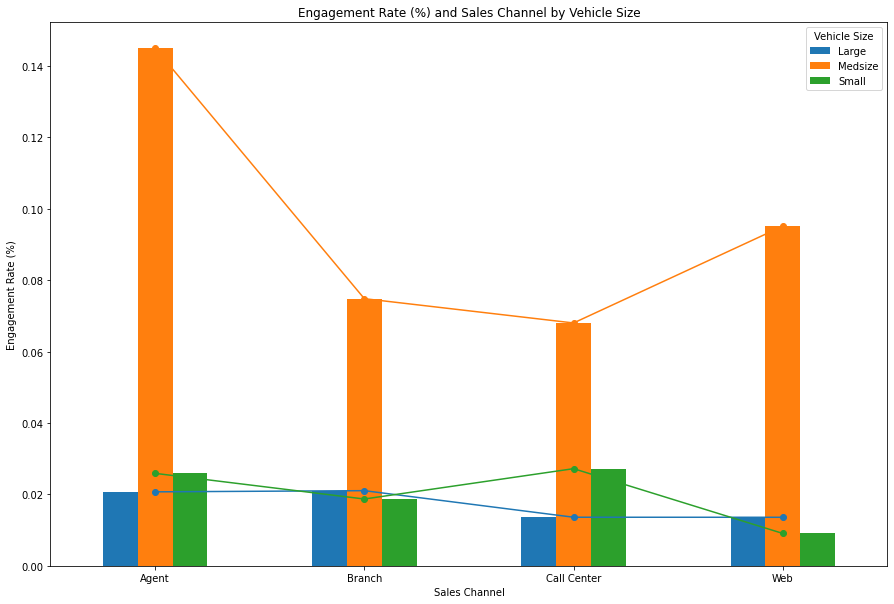

In [22]:
ax = by_sales_channel_data.plot(kind='bar',figsize=(7, 5))
ax1 = by_sales_channel_data.plot(figsize=(15, 10), marker='o',legend=False, ax=ax)
plt.title("Engagement Rate (%) and Sales Channel by Vehicle Size")
ax.set_ylabel('Engagement Rate (%)')
plt.show()

<h2>3. Exploratory Data Analysis</h2>

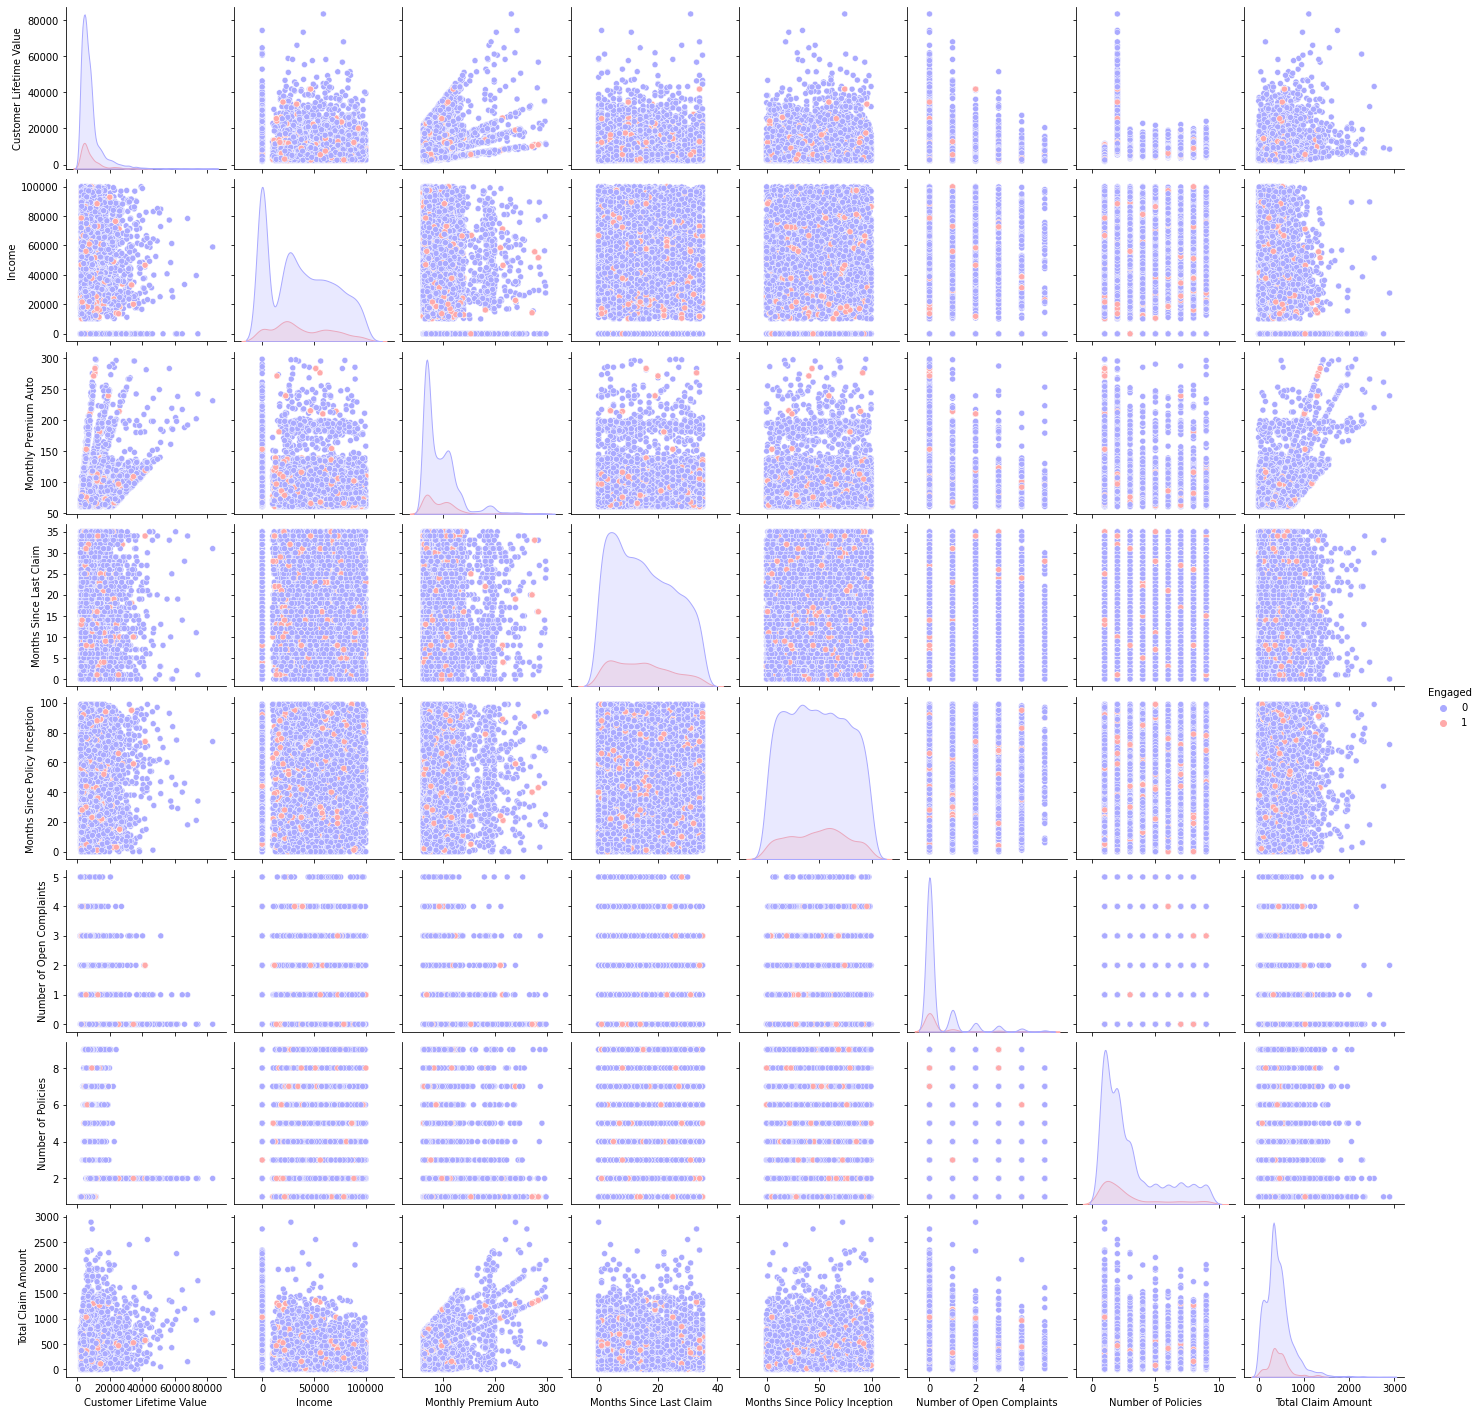

In [23]:
sns.pairplot(data=data,hue='Engaged',palette='bwr')

**Check correlation between  variables**

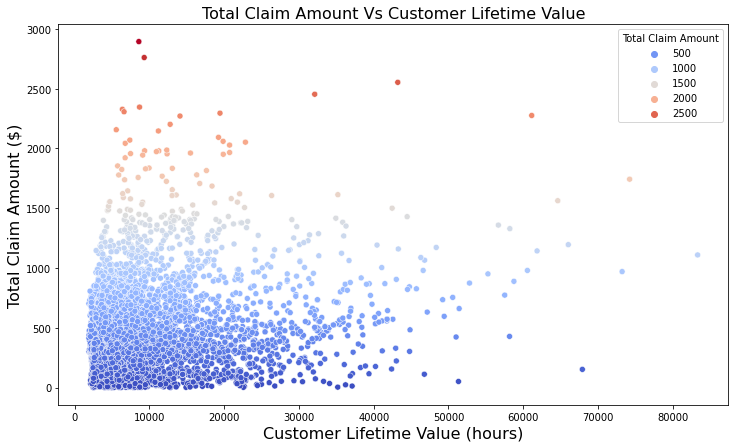

In [24]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=data,x='Customer Lifetime Value',y='Total Claim Amount',hue="Total Claim Amount",palette="coolwarm")
plt.title("Total Claim Amount Vs Customer Lifetime Value",fontsize=16)
plt.xlabel("Customer Lifetime Value (hours)",fontsize=16)
plt.ylabel('Total Claim Amount ($)',fontsize=16)
plt.show()

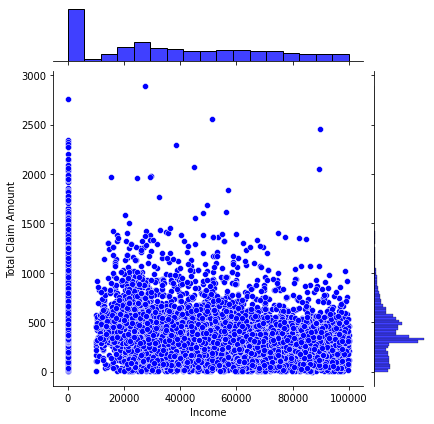

In [25]:
sns.jointplot(x='Income',y='Total Claim Amount', data=data, color='blue',sizes=20)


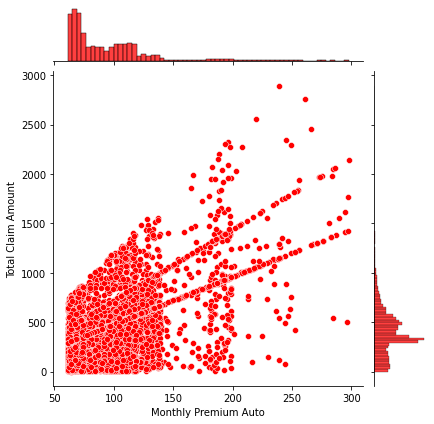

In [26]:
sns.jointplot(y='Total Claim Amount', x='Monthly Premium Auto',data=data,color='red')

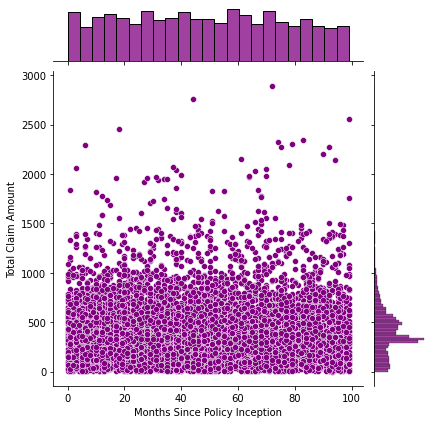

In [27]:
sns.jointplot(y='Total Claim Amount',x='Months Since Policy Inception',data=data,color="purple")

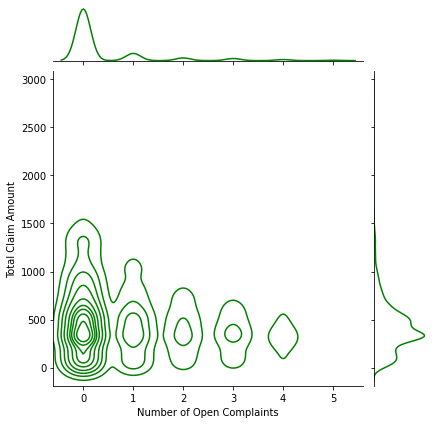

In [28]:
sns.jointplot(x ='Number of Open Complaints', y ="Total Claim Amount",kind="kde",data = data,color="green")

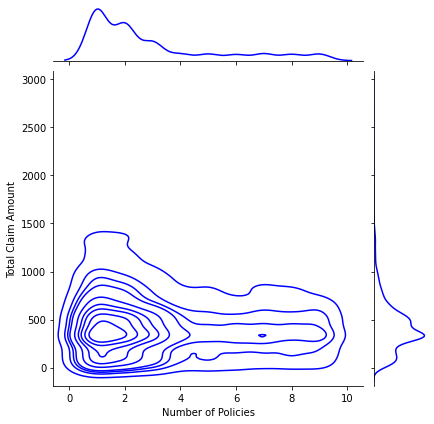

In [29]:
sns.jointplot(x ='Number of Policies', y ="Total Claim Amount",kind="kde",data = data,color="blue")

<AxesSubplot:>

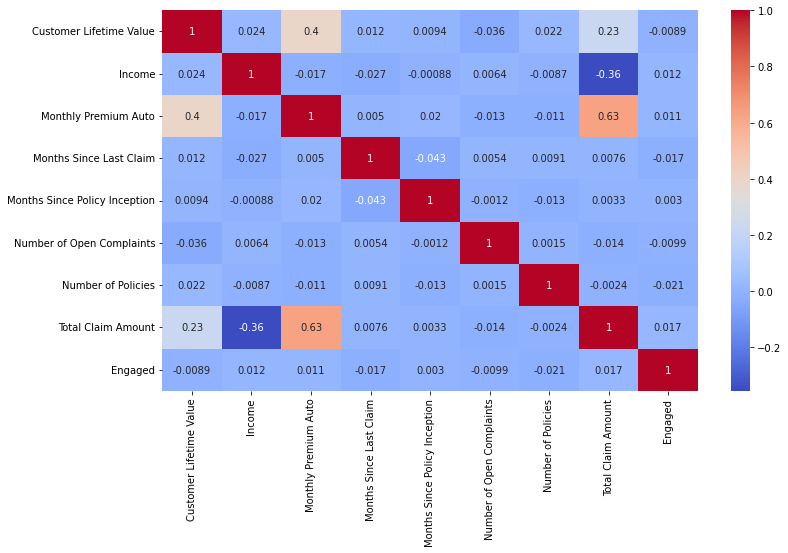

In [30]:
hm=data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(hm,annot=True,cmap='coolwarm')

**Double check the values that affect the variable ['Engeged']**

In [31]:
data.corr()['Engaged'].sort_values()

Number of Policies              -0.020891
Months Since Last Claim         -0.016597
Number of Open Complaints       -0.009881
Customer Lifetime Value         -0.008930
Months Since Policy Inception    0.002952
Monthly Premium Auto             0.010966
Income                           0.011932
Total Claim Amount               0.016877
Engaged                          1.000000
Name: Engaged, dtype: float64

<h2>4. Prepare before building the model</h2>


***Construct a new variable container containing the independent variables***

In [32]:
continuous_features = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
'Months Since Last Claim', 'Months Since Policy Inception',
'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

***Next, we proceed to deal with categorical variables***

In [33]:
columns_to_encode = ['Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage']
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(data[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    data = pd.concat([data, encoded_df], axis=1)
    
data['Is.Female'] = data['Gender'].apply(lambda x: 1 if x == 'F' else 0)
categorical_features.append('Is.Female')

After encoding all variables needed to numbers, we need to combine everything back into one data frame.

In [34]:
all_features = continuous_features + categorical_features
response = 'Engaged'
sample_data = data[all_features + [response]]
sample_data.columns = [x.replace(' ', '.') for x in sample_data.columns]
all_features = [x.replace(' ', '.') for x in all_features]

sample_data.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


<h2>5. Building Model Random Forest/h2>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

**Model phase - train/test**

1.Split the data file and test for later evaluation

In [36]:

x_train, x_test, y_train, y_test = train_test_split(sample_data[all_features], sample_data[response], test_size=0.3)


Now we can train and fit the random forest model

In [37]:
# Building random forest model
rf_model=RandomForestClassifier(n_estimators=200,max_depth=5)
# Features
X=x_train
# Output
y=y_train
#Fit model to training data
rf_model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [38]:
#Looking at individual trees
rf_model.estimators_
    
# individual tree setting
rf_model.estimators_[0]

#individual tree prediction
rf_model.estimators_[0].predict(x_test)[:10]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Above array is how tree number 0 voted on the first 10 samples. Pretty cool, right? Back to random forest, let’s see what the model thinks, which features are the most important for customer engagement.

In [39]:
#Examining what RF thinks are important features
rf_model.feature_importances_

feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
featsorted = feature_importance_df.sort_values(by='feature.importance', ascending=False)
featsorted

,feature.importance,feature
36,0.305650,EmploymentStatus.Retired
1,0.075928,Income
7,0.073694,Total.Claim.Amount
0,0.070107,Customer.Lifetime.Value
8,0.051007,Sales.Channel.Agent
38,0.050158,Marital.Status.Divorced
2,0.050043,Monthly.Premium.Auto
4,0.041275,Months.Since.Policy.Inception
3,0.035353,Months.Since.Last.Claim
34,0.027261,EmploymentStatus.Employed


- For ease of observation, we convert it to a graph 

<AxesSubplot:xlabel='feature'>

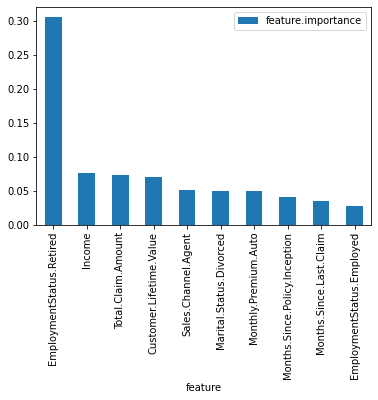

In [40]:
featsortedtop10=featsorted.head(10)
featsortedtop10.plot(kind='bar',x="feature")

## 6. Model Evaluation

In [41]:
in_sample=rf_model.predict(x_train)
out_sample=rf_model.predict(x_test)
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample))

In-Sample Accuracy: 0.8827
Out-of-Sample Accuracy: 0.8606


***Accuracy*** is the number of correct predictions divided by total number of predictions. Basically, what the random forest model got right in predicting who will engage with the marketing campaign.

In [42]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample))

In-Sample Precision: 0.9823
Out-of-Sample Precision: 0.9351


***Precision*** is the number of true positives divided by the number of true positives and false positives. You want precision, when you want to know how much the prediction was right. For example, how many customers actually engaged with X campaign than those who were predicted to and did not.

In [43]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample))

In-Sample Recall: 0.1292
Out-of-Sample Recall: 0.1604


***Recall*** is the number of true positives divided by the number of true positives and false negatives. In other words, how many the model correctly predicted that customers engaged with X campaign against those that actually did.

***When I was learning the difference of precision and recall***, it confused me for a bit. What helped me was looking at the differences of one being good and the other bad. For example, a high precision with a low recall can lead to spotting your target output, but leaving out a few more target output opportunities. On the other hand, a high recall with a low precision can lead to spotting all target outputs, but predicting target outputs that really aren’t.

In [44]:
# ROC and AUC curves
in_sample = rf_model.predict_proba(x_train)[:,1]
out_sample = rf_model.predict_proba(x_test)[:,1]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8788
Out-Sample AUC: 0.8385


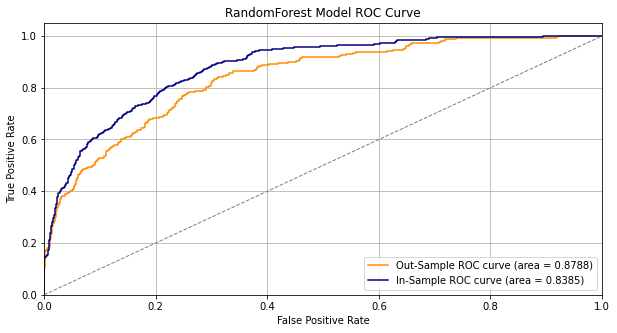

In [45]:
plt.figure(figsize=(10,5))
plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")
plt.show()